# Attention map

In [1]:
import argparse
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import glob

from vit_rollout import VITAttentionRollout
from vit_grad_rollout import VITAttentionGradRollout
import vit_explain as vex

In [2]:
def minmax_ego(PATH_sample_data_list, drive_name):
    voxel_feature_dict = {
        'num_of_points': list(),
        'x': list(),
        'y': list(),
        'z': list(),
        'dis_to_ego': list(),

        'changes_num_of_points': list(),
        'velocity_to_ego': list(),
        'velocity_x': list(),
        'velocity_y': list(),
        'velocity_z': list(),

        'acceleration_to_ego': list(),
        'acceleration_x': list(),
        'acceleration_y': list(),
        'acceleration_z': list()
    }

    for PATH_data in PATH_sample_data_list:
        with open(PATH_data, 'rb') as f:
            data = pickle.load(f)

        fm = data['feature_map']
        for x in range(13, 15):
            for y in range(13, 15):
                for key in voxel_feature_dict.keys():
                    voxel_feature_dict[key].append(fm[key][x][y])

    min_ego = {key:min(voxel_feature_dict[key]) for key in voxel_feature_dict.keys()}
    max_ego = {key:max(voxel_feature_dict[key]) for key in voxel_feature_dict.keys()}

    f = open(drive_name + '_ego.txt', 'w')
    f.write("MIN\n")
    for key in voxel_feature_dict.keys():
        f.write(key+': '+str(min_ego[key]))
        f.write('\n')
    f.write('\n')
    f.write("MAX\n")
    for key in voxel_feature_dict.keys():
        f.write(key+': '+str(max_ego[key]))
        f.write('\n')
    f.close()

In [3]:
def minmax_target_sample1(PATH_sample1_data_list, drive_name):
    # WARNING: HARD CODE
    file_number = [("00299", "00309")]
    minmax_file_number = file_number[0]

    voxel_feature_min_dict = {
        'num_of_points': list(),
        'x': list(),
        'y': list(),
        'z': list(),
        'dis_to_ego': list(),

        'changes_num_of_points': list(),
        'velocity_to_ego': list(),
        'velocity_x': list(),
        'velocity_y': list(),
        'velocity_z': list(),

        'acceleration_to_ego': list(),
        'acceleration_x': list(),
        'acceleration_y': list(),
        'acceleration_z': list()
    }

    voxel_feature_max_dict = {
        'num_of_points': list(),
        'x': list(),
        'y': list(),
        'z': list(),
        'dis_to_ego': list(),

        'changes_num_of_points': list(),
        'velocity_to_ego': list(),
        'velocity_x': list(),
        'velocity_y': list(),
        'velocity_z': list(),

        'acceleration_to_ego': list(),
        'acceleration_x': list(),
        'acceleration_y': list(),
        'acceleration_z': list()
    }

    f = open(drive_name + '_target.txt', 'w')

    for PATH_data in PATH_sample1_data_list:

        # MIN ATTENTION
        if PATH_data.split('/')[-1].split('\\')[1].split('.')[0] == minmax_file_number[0]:
            f.write("** MIN Attention: " + minmax_file_number[0]+ '\n')

            with open(PATH_data, 'rb') as pk:
                data = pickle.load(pk)

            fm = data['feature_map']
            for x in range(8, 10):
                for y in range(14, 16):
                    for key in voxel_feature_min_dict.keys():
                        voxel_feature_min_dict[key].append(fm[key][x][y])

            min_atten_min_ego = {key:min(voxel_feature_min_dict[key]) for key in voxel_feature_min_dict.keys()}
            min_atten_max_ego = {key:max(voxel_feature_min_dict[key]) for key in voxel_feature_min_dict.keys()}
            
            f.write("* MIN feature values\n")
            for key in voxel_feature_min_dict.keys():
                f.write(key+': '+str(min_atten_min_ego[key]))
                f.write('\n')
            f.write('\n')
            f.write("* MAX feature values\n")
            for key in voxel_feature_max_dict.keys():
                f.write(key+': '+str(min_atten_max_ego[key]))
                f.write('\n')
            
            f.write('\n')

        # MAX ATTENTION
        if PATH_data.split('/')[-1].split('\\')[1].split('.')[0] == minmax_file_number[1]:
            f.write("** MAX Attention: " + minmax_file_number[1]+ '\n')

            with open(PATH_data, 'rb') as pk:
                data = pickle.load(pk)

            fm = data['feature_map']
            for x in range(8, 10):
                for y in range(14, 15):
                    for key in voxel_feature_min_dict.keys():
                        voxel_feature_min_dict[key].append(fm[key][x][y])

            max_atten_min_ego = {key:min(voxel_feature_min_dict[key]) for key in voxel_feature_min_dict.keys()}
            max_atten_max_ego = {key:max(voxel_feature_min_dict[key]) for key in voxel_feature_min_dict.keys()}
            
            f.write("* MIN feature values\n")
            for key in voxel_feature_min_dict.keys():
                f.write(key+': '+str(max_atten_min_ego[key]))
                f.write('\n')
            f.write('\n')
            f.write("* MAX feature values\n")
            for key in voxel_feature_max_dict.keys():
                f.write(key+': '+str(max_atten_max_ego[key]))
                f.write('\n')
            
            f.write('\n')  

    f.close()

In [4]:
def minmax_target_sample2(PATH_sample2_data_list, drive_name):
    # WARNING: HARD CODE
    file_number = [("00318", "00290")]
    minmax_file_number = file_number[0]

    voxel_feature_min_dict = {
        'num_of_points': list(),
        'x': list(),
        'y': list(),
        'z': list(),
        'dis_to_ego': list(),

        'changes_num_of_points': list(),
        'velocity_to_ego': list(),
        'velocity_x': list(),
        'velocity_y': list(),
        'velocity_z': list(),

        'acceleration_to_ego': list(),
        'acceleration_x': list(),
        'acceleration_y': list(),
        'acceleration_z': list()
    }

    voxel_feature_max_dict = {
        'num_of_points': list(),
        'x': list(),
        'y': list(),
        'z': list(),
        'dis_to_ego': list(),

        'changes_num_of_points': list(),
        'velocity_to_ego': list(),
        'velocity_x': list(),
        'velocity_y': list(),
        'velocity_z': list(),

        'acceleration_to_ego': list(),
        'acceleration_x': list(),
        'acceleration_y': list(),
        'acceleration_z': list()
    }

    f = open(drive_name + '_target.txt', 'w')

    for PATH_data in PATH_sample2_data_list:

        # MIN ATTENTION
        if PATH_data.split('/')[-1].split('\\')[1].split('.')[0] == minmax_file_number[0]:
            f.write("** MIN Attention: " + minmax_file_number[0]+ '\n')

            with open(PATH_data, 'rb') as pk:
                data = pickle.load(pk)

            fm = data['feature_map']
            for x in range(10, 12):
                for y in range(14, 15):
                    for key in voxel_feature_min_dict.keys():
                        voxel_feature_min_dict[key].append(fm[key][x][y])

            min_atten_min_ego = {key:min(voxel_feature_min_dict[key]) for key in voxel_feature_min_dict.keys()}
            min_atten_max_ego = {key:max(voxel_feature_min_dict[key]) for key in voxel_feature_min_dict.keys()}
            
            f.write("* MIN feature values\n")
            for key in voxel_feature_min_dict.keys():
                f.write(key+': '+str(min_atten_min_ego[key]))
                f.write('\n')
            f.write('\n')
            f.write("* MAX feature values\n")
            for key in voxel_feature_max_dict.keys():
                f.write(key+': '+str(min_atten_max_ego[key]))
                f.write('\n')
            
            f.write('\n')

        # MAX ATTENTION
        if PATH_data.split('/')[-1].split('\\')[1].split('.')[0] == minmax_file_number[1]:
            f.write("** MAX Attention: " + minmax_file_number[1]+ '\n')

            with open(PATH_data, 'rb') as pk:
                data = pickle.load(pk)

            fm = data['feature_map']
            for x in range(10, 12):
                for y in range(14, 15):
                    for key in voxel_feature_min_dict.keys():
                        voxel_feature_min_dict[key].append(fm[key][x][y])

            max_atten_min_ego = {key:min(voxel_feature_min_dict[key]) for key in voxel_feature_min_dict.keys()}
            max_atten_max_ego = {key:max(voxel_feature_min_dict[key]) for key in voxel_feature_min_dict.keys()}
            
            f.write("* MIN feature values\n")
            for key in voxel_feature_min_dict.keys():
                f.write(key+': '+str(max_atten_min_ego[key]))
                f.write('\n')
            f.write('\n')
            f.write("* MAX feature values\n")
            for key in voxel_feature_max_dict.keys():
                f.write(key+': '+str(max_atten_max_ego[key]))
                f.write('\n')
            
            f.write('\n')  

    f.close()

In [5]:
def minmax_target_sample3(PATH_sample3_data_list, drive_name):
    # WARNING: HARD CODE
    file_number = [("00277", "00283")]
    minmax_file_number = file_number[0]

    voxel_feature_min_dict = {
        'num_of_points': list(),
        'x': list(),
        'y': list(),
        'z': list(),
        'dis_to_ego': list(),

        'changes_num_of_points': list(),
        'velocity_to_ego': list(),
        'velocity_x': list(),
        'velocity_y': list(),
        'velocity_z': list(),

        'acceleration_to_ego': list(),
        'acceleration_x': list(),
        'acceleration_y': list(),
        'acceleration_z': list()
    }

    voxel_feature_max_dict = {
        'num_of_points': list(),
        'x': list(),
        'y': list(),
        'z': list(),
        'dis_to_ego': list(),

        'changes_num_of_points': list(),
        'velocity_to_ego': list(),
        'velocity_x': list(),
        'velocity_y': list(),
        'velocity_z': list(),

        'acceleration_to_ego': list(),
        'acceleration_x': list(),
        'acceleration_y': list(),
        'acceleration_z': list()
    }

    f = open(drive_name + '_target.txt', 'w')

    for PATH_data in PATH_sample3_data_list:

        # MIN ATTENTION
        if PATH_data.split('/')[-1].split('\\')[1].split('.')[0] == minmax_file_number[0]:
            f.write("** MIN Attention: " + minmax_file_number[0]+ '\n')

            with open(PATH_data, 'rb') as pk:
                data = pickle.load(pk)

            fm = data['feature_map']
            for x in range(11, 13):
                for y in range(14, 15):
                    for key in voxel_feature_min_dict.keys():
                        voxel_feature_min_dict[key].append(fm[key][x][y])

            min_atten_min_ego = {key:min(voxel_feature_min_dict[key]) for key in voxel_feature_min_dict.keys()}
            min_atten_max_ego = {key:max(voxel_feature_min_dict[key]) for key in voxel_feature_min_dict.keys()}
            
            f.write("* MIN feature values\n")
            for key in voxel_feature_min_dict.keys():
                f.write(key+': '+str(min_atten_min_ego[key]))
                f.write('\n')
            f.write('\n')
            f.write("* MAX feature values\n")
            for key in voxel_feature_max_dict.keys():
                f.write(key+': '+str(min_atten_max_ego[key]))
                f.write('\n')
            
            f.write('\n')

        # MAX ATTENTION
        if PATH_data.split('/')[-1].split('\\')[1].split('.')[0] == minmax_file_number[1]:
            f.write("** MAX Attention: " + minmax_file_number[1]+ '\n')

            with open(PATH_data, 'rb') as pk:
                data = pickle.load(pk)

            fm = data['feature_map']
            for x in range(11, 13):
                for y in range(14, 15):
                    for key in voxel_feature_min_dict.keys():
                        voxel_feature_min_dict[key].append(fm[key][x][y])
            for key in voxel_feature_min_dict.keys():
                        voxel_feature_min_dict[key].append(fm[key][11][13])

            max_atten_min_ego = {key:min(voxel_feature_min_dict[key]) for key in voxel_feature_min_dict.keys()}
            max_atten_max_ego = {key:max(voxel_feature_min_dict[key]) for key in voxel_feature_min_dict.keys()}
            
            f.write("* MIN feature values\n")
            for key in voxel_feature_min_dict.keys():
                f.write(key+': '+str(max_atten_min_ego[key]))
                f.write('\n')
            f.write('\n')
            f.write("* MAX feature values\n")
            for key in voxel_feature_max_dict.keys():
                f.write(key+': '+str(max_atten_max_ego[key]))
                f.write('\n')
            
            f.write('\n')  

    f.close()

### Path Setting

In [6]:
PATH_model = "../../model/model19.pt"

PATH_sample_data_TP_list = glob.glob("../../dataset/data_preprocessed/Vulner/21-12-01-11-41-59_end_extract_drive8/*") # 285~325
PATH_sample_data_TN_list = glob.glob("../../dataset/data_preprocessed/None-crash/21-12-01-11-07-44_end_extract_drive3/*") # 300~350
PATH_sample_data_FP_list = glob.glob("../../dataset/data_preprocessed/None-crash/21-12-29-11-04-19_end_extract_drive14/*") # 95~115
PATH_sample_data_FN_list = glob.glob("../../dataset/data_preprocessed/Vulner/21-12-14-15-04-44_end_extract_drive2/*") # 290~305 -> start with 292

PATH_sample_data_TN_list = PATH_sample_data_TN_list[297:347+1]
PATH_sample_data_FP_list = PATH_sample_data_FP_list[92:112+1]

### Load Model

In [7]:
# using CPU
model = torch.load(PATH_model)
model.eval()
model.cpu()

ViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=2, p2=2)
    (1): Linear(in_features=56, out_features=128, bias=True)
  )
  (dropout): Dropout(p=0.0, inplace=False)
  (transformer): Transformer(
    (layers): ModuleList(
      (0): ModuleList(
        (0): PreNorm(
          (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (fn): Attention(
            (attend): Softmax(dim=-1)
            (dropout): Dropout(p=0.0, inplace=False)
            (to_qkv): Linear(in_features=128, out_features=1536, bias=False)
            (to_out): Sequential(
              (0): Linear(in_features=512, out_features=128, bias=True)
              (1): Dropout(p=0.0, inplace=False)
            )
          )
        )
        (1): PreNorm(
          (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (fn): FeedForward(
            (net): Sequential(
              (0): Linear(in_features=128, out_features=2048, bia

### Draw

Unexpected exception formatting exception. Falling back to standard exception
Unexpected exception formatting exception. Falling back to standard exception
Unexpected exception formatting exception. Falling back to standard exception


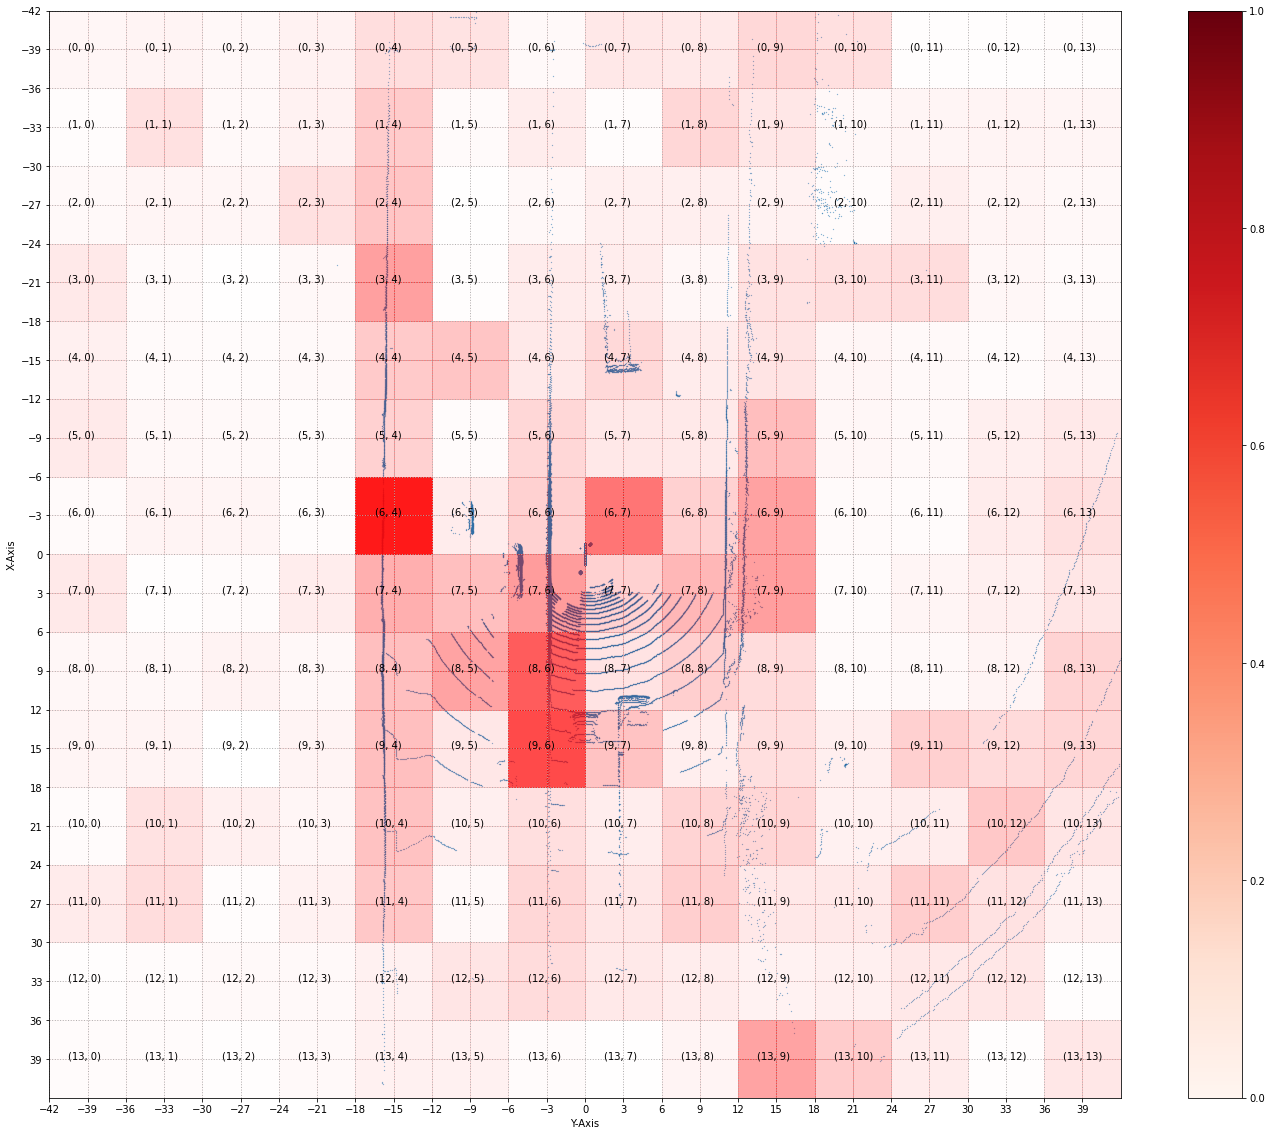

--- Logging error ---
--- Logging error ---
--- Logging error ---
--- Logging error ---
--- Logging error ---
Error in sys.excepthook:
Traceback (most recent call last):
  File "c:\anaconda3\envs\vit\lib\linecache.py", line 47, in getlines
    return updatecache(filename, module_globals)
  File "c:\anaconda3\envs\vit\lib\linecache.py", line 137, in updatecache
    lines = fp.readlines()
  File "c:\anaconda3\envs\vit\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 6605: invalid start byte

Original exception was:
Traceback (most recent call last):
  File "c:\anaconda3\envs\vit\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Seo Jungwook\AppData\Local\Temp\ipykernel_528\3294692203.py", line 2, in <cell line: 1>
  File "c:\Users\Seo Jungwook\Documents\vit-lidar-auto

: 

: 

In [ ]:
for data in PATH_sample_data_TP_list:
    vex.draw_img_sample_custom(model=model, PATH_data=data)

In [ ]:
for data in PATH_sample_data_TN_list:
    vex.draw_img_sample_custom(model=model, PATH_data=data)

In [ ]:
for data in PATH_sample_data_FP_list:
    vex.draw_img_sample_custom(model=model, PATH_data=data)

In [ ]:
for data in PATH_sample_data_FN_list:
    vex.draw_img_sample_custom(model=model, PATH_data=data)